### Preprocessing
1. Onset time = 1s - first onset

(9160,) (8280,) (945,)


ValueError: x and y must have same first dimension, but have shapes (8280,) and (9160,)

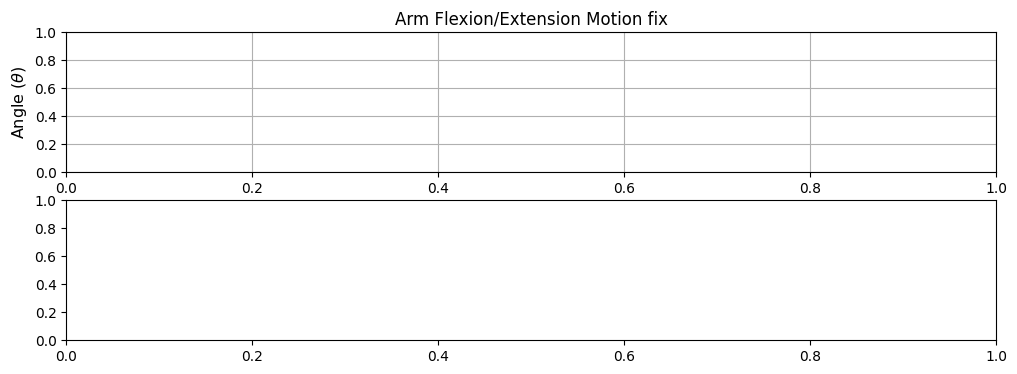

In [23]:
#correct angle
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import mne


fs = 250
duration = 40
buffer_duration = 1

D = ("../arm-track/CapiLab-dataset3b/*angle*", "../arm-track/CapiLab-dataset3b/*timestamps*", "../arm-track/CapiLab-dataset3b/*event*")
DATA_PATH = [(fa, ft, fe) for fa, ft, fe in zip(glob(D[0]), glob(D[1]), glob(D[2]))]
f, axs= plt.subplots(2,1,figsize = (12,4))
for i,(fa, ft, fe) in enumerate(DATA_PATH):


    e = np.load(fe) #load event
    start_of_task_idx = np.where(e == 1)[0][0] - fs * buffer_duration #remove preparation period

    t = np.load(ft)
    t = t[start_of_task_idx:]
    # a = np.load(fa, allow_pickle=True)

    print(e.shape, t.shape, a.shape)
    
    t = t - t[0] #remove starting offset time


    start_t, end_t = t[0], t[-1]
    # axs[0].plot(np.linspace(start_t, end_t, len(a)), a, label = f'Trial-{i + 1}')
    axs[0].grid(True)
    axs[0].set_title("Arm Flexion/Extension Motion fix")
    axs[0].set_xlabel('Time (s)', fontsize = 11.5)
    axs[0].set_ylabel(r'Angle ($\theta$)', fontsize = 11.5)

    axs[1].plot(t, e)
    # break

plt.legend(loc = (1.01,0.349))


plt.show()
